# BLT1 CTD Processing

Note: Need to run this currently with conda environment `ana` as ctdproc is not installed under `blt`. Need to change this on shore.

In [3]:
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
import pandas as pd
# import cartopy.crs as ccrs
from pathlib import Path
import os
import warnings
import gsw

import gvpy as gv
# import underway as uw
import ctdproc as ctd

import ctd_proc as bcp

%reload_ext autoreload
%autoreload 2

plt.ion()

%config InlineBackend.figure_format = 'retina'

pd.options.display.html.table_schema = True

In [4]:
warnings.filterwarnings('ignore', message='Mean of empty slice')

Sync ctd data

In [5]:
# localpath = Path('/Users/gunnar/Projects/blt/cruises/blt1/data')
# m = uw.io.Underway(ship='discovery', localdir=localpath, atsea=True)

Process ctd cast

In [40]:
# for i in range(144, 150):
i = 80
stn = i
bcp.proc_raw(stn)

Converting hex file...
Cleaning data...
1: tau = 0.0491s, lag = -0.0118s
2: tau = 0.0494s, lag = -0.0098s
1: tau = 0.0483s, lag = -0.0255s
2: tau = 0.0602s, lag = -0.0106s
Depth binning...
Saving data files...
Done


Compare with old version.

In [49]:
stn = 80
a = xr.open_dataset(f'/Users/gunnar/Projects/blt/data/blt1/ctd/proc/nc/blt_ctd_prof_dc_{stn:03d}.nc')
b = xr.open_dataset(f'/Users/gunnar/Projects/blt/cruises/blt1/data/ctd/proc/nc/blt_ctd_prof_dc_{stn:03d}.nc')

In [24]:
a = xr.open_dataset('/Users/gunnar/Projects/blt/data/blt1/ctd/proc/nc/blt_ctd_prof_dc_010.nc')
b = xr.open_dataset('/Users/gunnar/Projects/blt/cruises/blt1/data/ctd/proc/nc/blt_ctd_prof_dc_010.nc')

In [50]:
c = b.swap_dims({'z': 'depth'})

In [57]:
a

<xarray.Dataset>
Dimensions:  (depth: 1394)
Coordinates:
  * depth    (depth) float64 5.0 6.0 7.0 8.0 ... 1.396e+03 1.397e+03 1.398e+03
    lon      (depth) float64 ...
    lat      (depth) float64 ...
    time     (depth) datetime64[ns] ...
Data variables: (12/17)
    t1       (depth) float64 ...
    t2       (depth) float64 ...
    c1       (depth) float64 ...
    c2       (depth) float64 ...
    p        (depth) float64 ...
    trans    (depth) float64 ...
    ...       ...
    CT1      (depth) float64 ...
    CT2      (depth) float64 ...
    th1      (depth) float64 ...
    th2      (depth) float64 ...
    sg1      (depth) float64 ...
    sg2      (depth) float64 ...
Attributes: (12/19)
    verbose:         1
    bounds_p:        [   0. 6200.]
    bounds_t:        [-2. 40.]
    bounds_c:        [2.5 6. ]
    bounds_s:        [20 38]
    spike_thresh_t:  0.5
    ...              ...
    diff_s:          0.001
    diff_p:          2.0
    wthresh:         0.1
    plot_spectra:    0
    plot_path:       
    tcfit:           [ 500.         1416.61471804]

In [51]:
c

<xarray.Dataset>
Dimensions:  (depth: 1394)
Coordinates:
  * depth    (depth) float64 5.0 6.0 7.0 8.0 ... 1.396e+03 1.397e+03 1.398e+03
    lon      (depth) float64 ...
    lat      (depth) float64 ...
    time     (depth) datetime64[ns] ...
Data variables: (12/17)
    t1       (depth) float64 ...
    t2       (depth) float64 ...
    c1       (depth) float64 ...
    c2       (depth) float64 ...
    p        (depth) float64 ...
    trans    (depth) float64 ...
    ...       ...
    CT1      (depth) float64 ...
    CT2      (depth) float64 ...
    th1      (depth) float64 ...
    th2      (depth) float64 ...
    sg1      (depth) float64 ...
    sg2      (depth) float64 ...
Attributes:
    tau1:     0.04911087426613836
    tau2:     0.049384391108203606
    L1:       -0.01180783021798031
    L2:       -0.00981991665031147

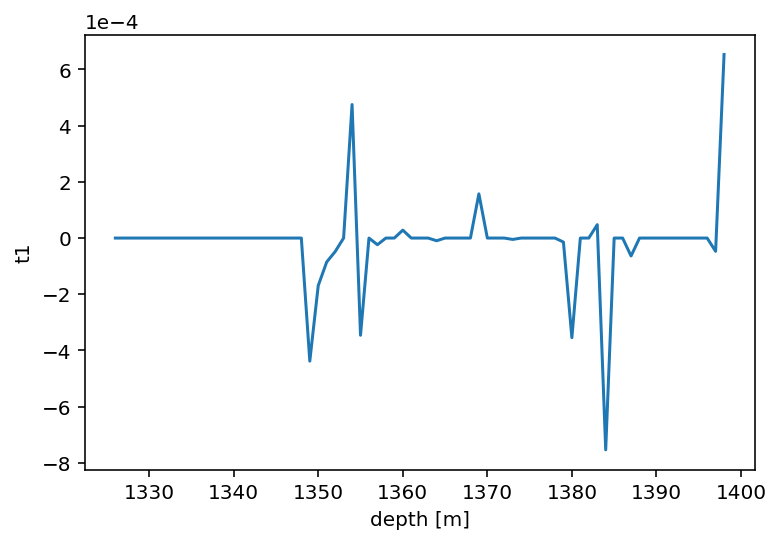

In [56]:
(a.t1-c.t1).where(a.depth>1325).plot()

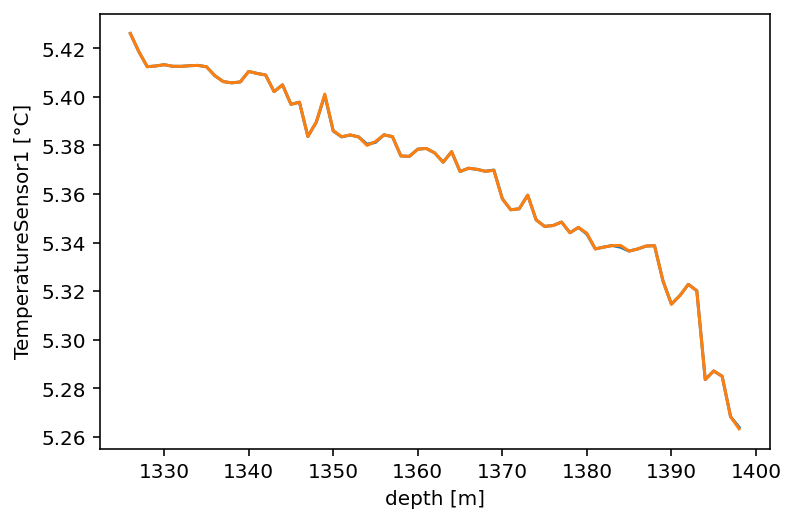

In [59]:
a.t1.where(a.depth>1325).plot()
c.t1.where(a.depth>1325).plot()

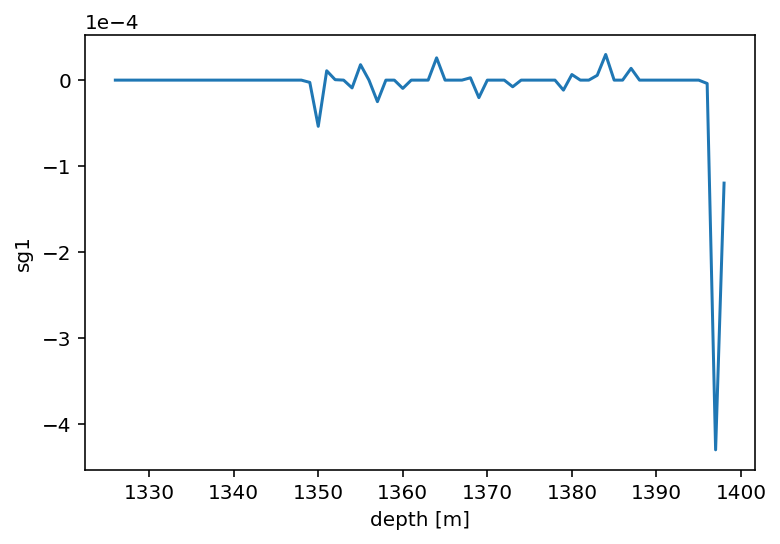

In [60]:
(a.sg1-c.sg1).where(a.depth>1325).plot()

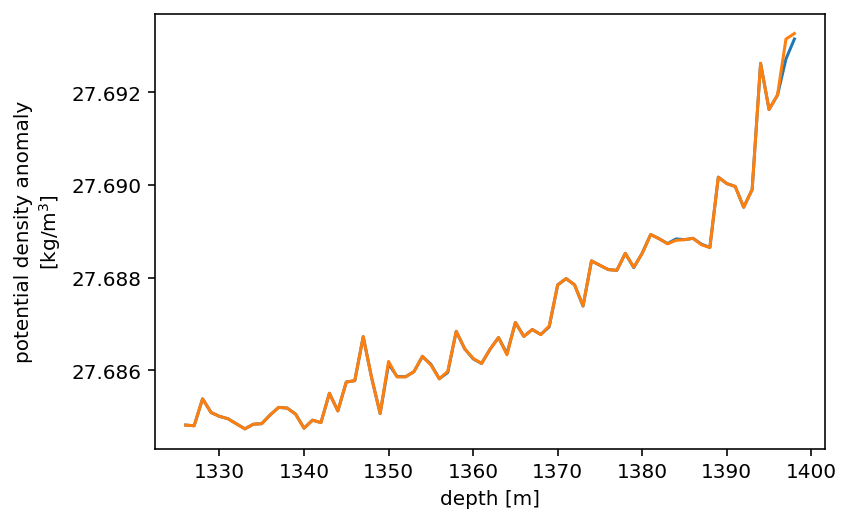

In [61]:
a.sg1.where(a.depth>1325).plot()
c.sg1.where(a.depth>1325).plot()

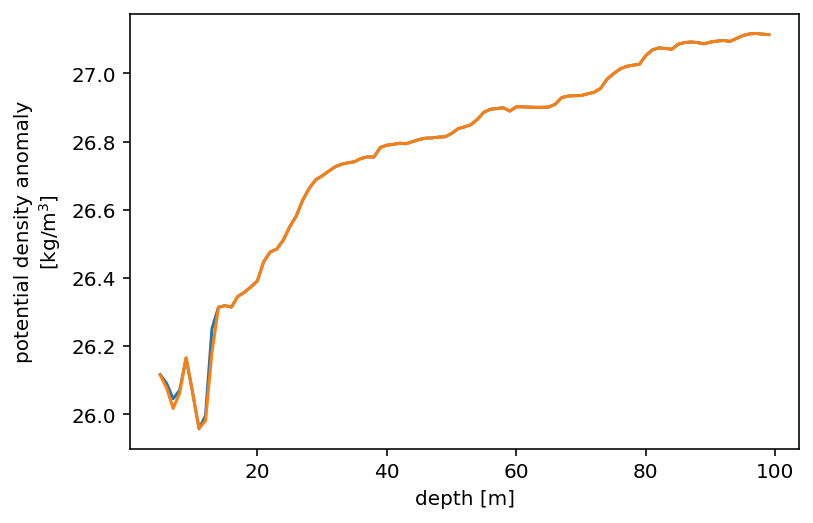

In [62]:
a.sg1.where(a.depth<100).plot()
c.sg1.where(a.depth<100).plot()

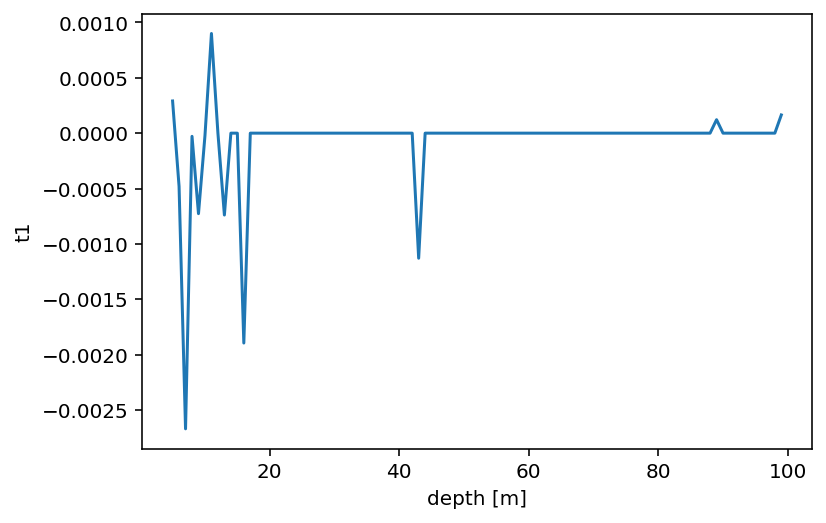

In [63]:
(a.t1-c.t1).where(a.depth<100).plot()